In [1]:
import pandas as pd

from project.model import get_inputs
from project.utils import make_plot

In [2]:
output = get_inputs(variables=['buildings'])
buildings = output['buildings']

2022-11-18 14:25:08,045 - 14020 - log_ - INFO - Creating AgentBuildings object


### Heating need with historical consumption

In [3]:
heat = pd.Series({year: buildings.heating_need(climate=year, hourly=False).sum() for year in range(1990, 2019)})

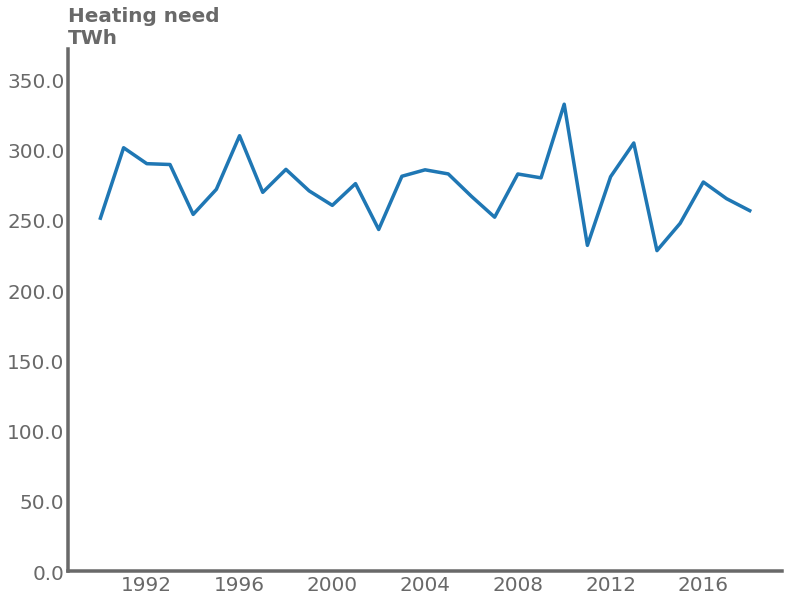

In [4]:
make_plot(heat / 10**9, 'Heating need (TWh)', legend=False)

#### Hourly heating need

In [5]:
heating_need = buildings.heating_need(climate=2006)
heating_need_smooth = buildings.heating_need(climate=2006, smooth=True)
heating_need = heating_need.sum(axis=1)
heating_need_smooth = heating_need_smooth.sum(axis=1)

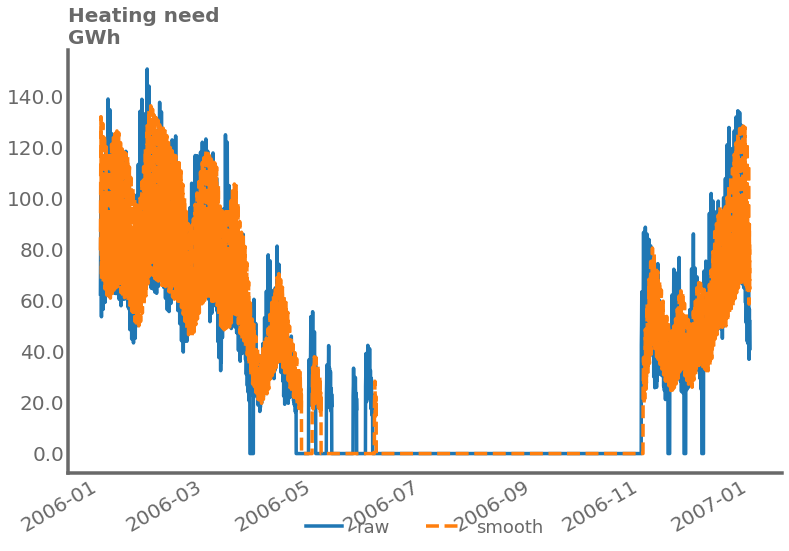

In [6]:
make_plot(pd.concat((heating_need.rename('raw'), heating_need_smooth.rename('smooth')), axis=1) / 10**6, 'Heating need (GWh)', integer=False, ymin=None)